# README

# 実行環境の前提条件

> ハンズオンでは、ここに記す条件は既に設定済となっています。

* Notebook環境
  - [Jupyter Notebook for Literate Computing for Reproducible Infrastructure](https://github.com/NII-cloud-operation/Jupyter-LC_docker)
* VCP SDK
  - バージョン: 18.10.1
* Python
  - 3.6
* クラウドプロバイダ
  - AWS

* 依存関係にある外部サーバ
  - 利用者の認証情報、ユーザ情報を格納してある LDAPサーバにアクセスできること
  - 利用者のホームディレクトリをNFSマウントできるNFSサーバにアクセスできること
* 構築環境のホストに関する情報
  - 外部から構築環境にアクセスする際のホスト名がDNSに登録されていること
  - ホスト名に対応したサーバ証明書と秘密鍵が用意されていること
  - ホスト名を書き込んだ YAML ファイルが `./group_vars/all/customize.yml` に用意されていること
    * YAMLファイルの記述内容は以下に示すような `server_name: `の後にホスト名を記した１行からなるファイルである
```
server_name: ocsXXXX.vcp-handson.org
```

# 全体構成

![構成](images/guacamole-201-01.png)

# Notebook一覧

次のセルを実行すると、このハンズオンで実行するNotebookの一覧が表示されます。

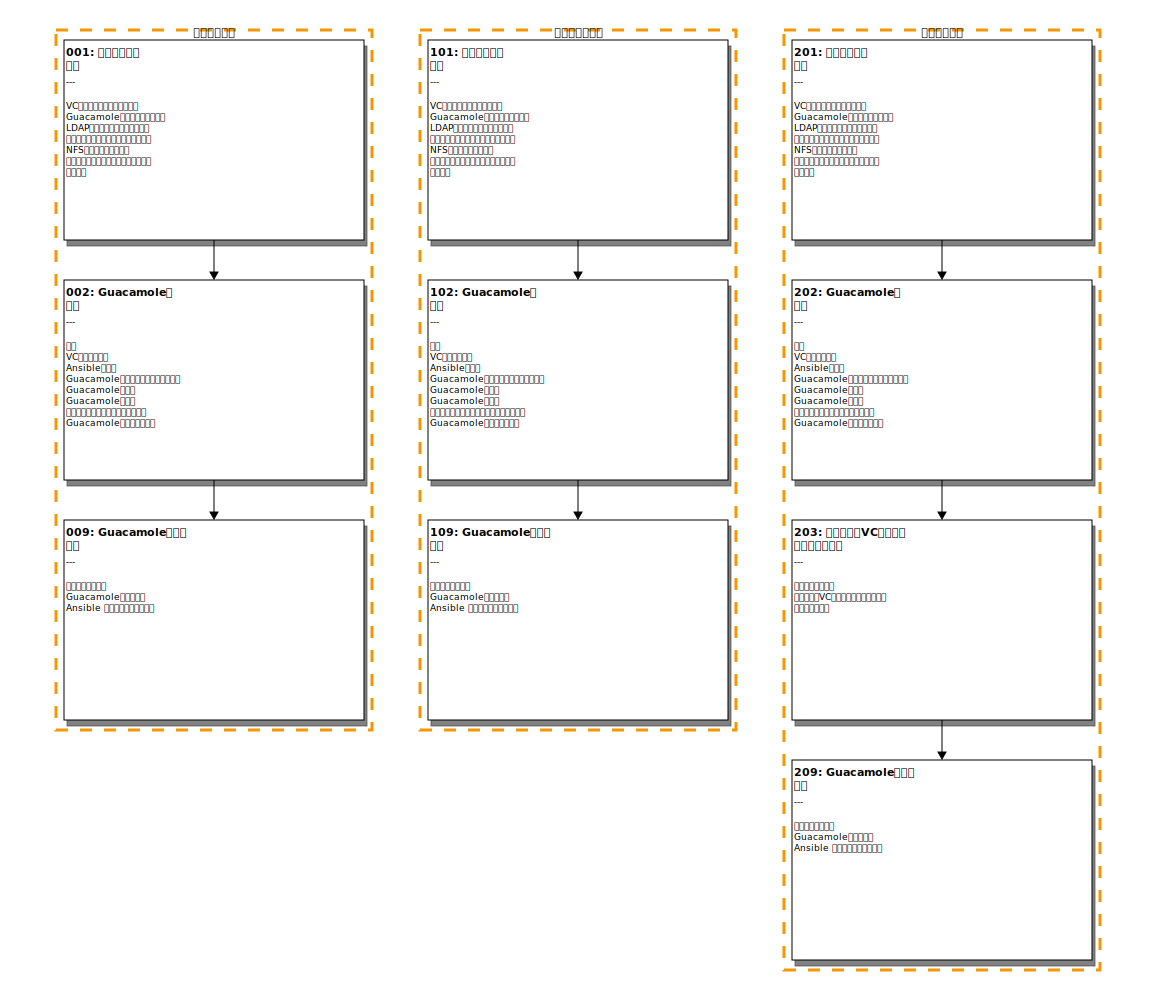

In [1]:
%%svg
images/notebooks.svg

上に示したNotebookは「A.シンプル構成」「B.演習環境の変更」「C.スケール変更」の３つグループに分かれます。各グループのNotebookは、ほぼ同じNotebookの記述内容になっています。これはテンプレートとなるNotebookが存在しており、それをコピーして各構成に合わせたパラメータを記したものになっているためです。

![Notebookのグループ毎の関係](images/guacamole-000-02.png)

このハンズオンで実際に実行するNotebookの元になったNotebookは `./template/Notebook/` のディレクトリに格納されています。

# ハンズオン環境へのアクセス（参考）

ハンズオンのNotebook環境にはAWSのパブリックサブネットに配置したNATインスタンスを経由してアクセスできるように設定されています。Notebook環境とVCP SDKによって起動されるVCノードはプライベートサブネットに配置されます。

![ハンズオン環境](images/guacamole-000-03.png)

# 準備

この後に実行するNotebookで必要となるSSHの公開鍵認証のための鍵ファイルを作成します。
作成したSSHの鍵ファイルはこのNotebook環境からVCノードにログインする際に利用します。

次のセルを実行してください。

In [2]:
!mkdir -p -m 700 ~/.ssh
!touch ~/.ssh/known_hosts && chmod 600 ~/.ssh/known_hosts
!test -f ~/.ssh/id_rsa || ssh-keygen -t rsa -f ~/.ssh/id_rsa -N ""
!ls -la ~/.ssh

total 48
drwx------  2 bit_kun users 4096 Mar 20 18:53 .
drwxr-xr-x 25 bit_kun users 4096 Mar 20 19:01 ..
-rw-------  1 bit_kun users 1675 Mar 20 12:03 id_rsa
-rw-r--r--  1 bit_kun users  402 Mar 20 12:03 id_rsa.pub
-rw-------  1 bit_kun users 8733 Mar 20 19:04 known_hosts
